# Mendoza, W. (2015). Demanda y oferta agregada en presencia de políticas monetarias no convencionales

1. ¿Cuál es la pregunta de investigación del artículo?

El autor trata de dar respuesta a la pregunta ¿qué se pudo hacer en la crisis del 2008-2009?  Con la inclusión de un mercado de bonos a largo plazo, en el modelo IS-LM se cuestiona las políticas monetarias no convencionales puestas en marcha por el FED tras la crisis internacional de 2008-2009. Ante ello, el autor señala que los modelos y métodos antiguos 
instrumentos «no convencionales», desde el keynesianismo, en particular el de la intervención en los mercados de deuda a largo plazo, son todavía útiles para abordar problemas macroeconómicos contemporáneos. 

2. ¿Cuáles son las fortalezas y debilidades del enfoque del documento para responder a esa pregunta?

El autor propone reconsiderar viejos métodos y modelos, para lo que evidencia la secuencia entre un alza del gasto público que reactiva la economía, hace subir la tasa de interés de largo plazo, eleva el nivel de precios y eleva el stock de bonos de corto plazo en poder del banco central. Es decir, realiza un proceso inductivo, matemático y gráfico.
Una limitación de esta propuesta puede ser el alcance o nivel de generalización de la misma, ya que se propone revalorar métodos tradicionales, pero no hay muchos casos donde se aplique este análisis porque las crisis de esta magnitud macroeconómica global son pocas.

3. ¿Cómo avanza este documento el conocimiento sobre la pregunta, es decir, cuál es la contribución? 

La contribución del artículo se da en razón que abre el debate a reconsiderar los modelos y métodos tradicionales en problemas macroeconómicos contemporaneos y prueba su validez

4. ¿Cuáles serían uno o dos próximos pasos específicos para avanzar en esta pregunta? (Lean otros articulos relacionados)

Uno de los pasos a avanzar en la línea de reconsiderar la relevancia de métodos y modelos tradicionales es la de contrastar la validez de este análisis a otros contextos de crisis, como el vivido tras las medidas de confinamiento por la pandemia. Por ejemplo, Guasque y Guasque (2020) han considerado esta opción teóricamente, pero sin un sustento matemático detrás. Otro aspecto que podría afinar esta propuesta es valerse de datos empíricos para probar algunas de las ideas teóricas, como el texto mencionado elabora. También se puede determinar qué alcances tiene este enfoque. Una pregunta al respecto puede ser si este modelo sirve solo para entender la recuperación económica o hasta qué momento. Algunos autores como Alfonoso (2020) cuestionan el rol del Estado a modo de un keynesianismo, con mayor intervención en la economía, entendido como una excepción. 

Afonso, A. J. (2020). O retorno do Estado, a crise pandémica e o keynesianismo de exceção. Lutas Sociais, 24(45), 216-228.

Guasque, B., & Guasque, A. (2020). Pandemic and the Necessary and Timely Return to Keynesian Insights.

In [81]:
import ipywidgets as widgets
import matplotlib.pyplot as plt
import numpy as np
import sympy as sy
from sympy import *
import pandas as pd
#from causalgraphicalmodels import CausalGraphicalModel

A partir del siguiente sistema de ecuaciones que representan el modelo IS-LM

- Encuentre las ecuaciones de Ingreso  y tasa de interes  de equilibrio(Escriba paso a paso la derivacion de estas ecuaciones).

- Grafique el equilibrio simultáneo en los mercados de bienes y de dinero.

Por un lado, considerando la ecuación de la curva IS

$$ r = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Donde $ B_0 = C_o + I_o + G_o + X_o $ y $ B_1 = 1 - (b - m)(1 - t) $

Y, por otro lado, la ecuación de la curva LM:

$$  r = -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y $$

Podemos igualar, sustituir o reducir ambas ecuaciones para encontrar el nivel de Ingresos equilibrio $(Y^e)$ y la tasa de interés de equilibrio $(r^e)$:

$$ -\frac{1}{j}\frac{Mo^s}{P_o} + \frac{k}{j}Y = \frac{B_o}{h} - \frac{B_1}{h}Y $$

- Ingreso de equilibrio:

$$ Y^e = \frac{j B_o}{k h + j B_1} + (\frac{h}{k h + j B_1})\frac{Ms_o}{P_o} $$

- Tasa de interés de equilibrio:

$$ r^e = \frac{kB_o}{kh + jB_1} - (\frac{B_1}{kh + jB_1})\frac{Ms_o}{P_o} $$

Estas dos ecuaciones representan el modelo IS-LM

In [82]:
##Las ecuaciones de equilibrio del ingreso y tasa de interés
# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

#### Gráfico del equilibrio en los mercados de bienes y dinero

In [83]:
#--------------------------------------------------
    # Curva IS

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo)/h - ( ( 1-(b-m)*(1-t) ) / h)*Y  
    return r_IS

r_is = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#--------------------------------------------------
    # Curva LM 

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def r_LM(k, j, Ms, P, Y):
    r_LM = - (1/j)*(Ms/P) + (k/j)*Y
    return r_LM

r_lm = r_LM( k, j, Ms, P, Y)

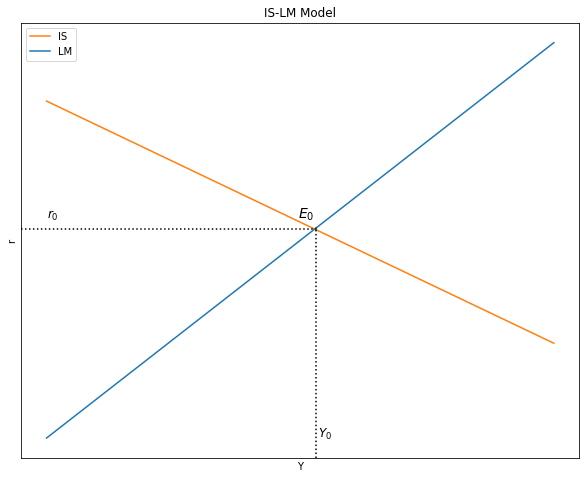

In [84]:
# Gráfico del modelo IS-LM

# Dimensiones del gráfico
y_max = np.max(r_lm)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
# Curva IS
ax.plot(Y, r_is, label = "IS", color = "C1") #IS
# Curva LM
ax.plot(Y, r_lm, label="LM", color = "C0")  #LM

# Eliminar las cantidades de los ejes
ax.yaxis.set_major_locator(plt.NullLocator())   
ax.xaxis.set_major_locator(plt.NullLocator())

# Texto y figuras agregadas
# Graficar la linea horizontal - r
plt.axvline(x=52.5,  ymin= 0, ymax= 0.53, linestyle = ":", color = "black")
# Grafica la linea vertical - Y
plt.axhline(y=94.5, xmin= 0, xmax= 0.53, linestyle = ":", color = "black")

# Plotear los textos 
plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(0,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-10, '$Y_0$', fontsize = 12, color = 'black')

# Título, ejes y leyenda
ax.set(title="IS-LM Model", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()

> Estática comparativa

a) Analice los efectos sobre las variables endógenas Y, r de una disminución del gasto fiscal. . El análisis debe ser intuitivo, matemático y gráfico.

- Mercado de Bienes
$$ Go↓ → DA↓ → DA<Y → Y↓ $$ 
- Mercado de dinero
$$ Y↓ → Md↓ → Md<Ms → r↓ $$ 

- **Matemática**:

In [85]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [86]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial del gasto autonomo =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


In [87]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo = ", df_r_eq_Go)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


- **Grafica**:

In [88]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [89]:
#--------------------------------------------------
    # NUEVA curva IS: reducción Gasto de Gobienro (Go)
    
# Definir SOLO el parámetro cambiado
Go = 30

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

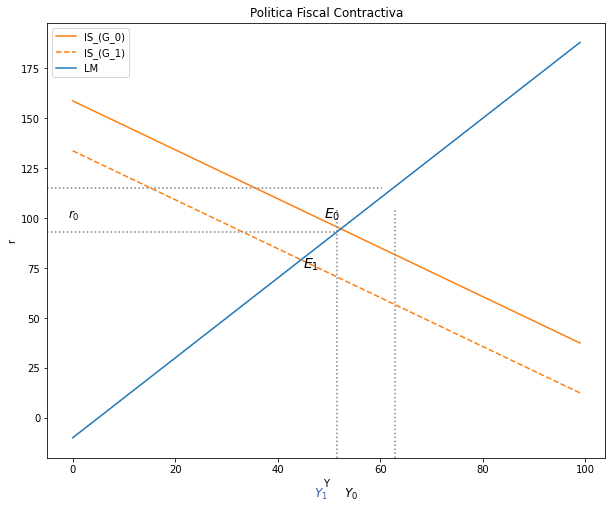

In [90]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "C1") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "C1", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

plt.axvline(x=63,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=115, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(45,75, '$E_1$', fontsize = 14, color = 'black')

plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Contractiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()


b) Analice los efectos sobre las variables endógenas Y, r de una disminución de la masa monetaria. . El análisis debe ser intuitivo, matemático y gráfico.


- Mercado de dinero
$$ Ms↓ → M^o↓ → M^o < M^d → r↑ $$

- Mercado de Bienes
$$ r↑ → I↓ → DA<Y → Y↓ $$ 

In [91]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [92]:
df_r_eq_Ms = diff(r_eq, Ms)
print("El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria = ", df_r_eq_Ms)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial de la masa monetaria =  h/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [93]:
df_Y_eq_Ms = diff(Y_eq, Ms)
print("El Diferencial del producto con respecto al diferencial de la masa monetaria = ", df_Y_eq_Ms)  # este diferencial es positivo

El Diferencial del producto con respecto al diferencial de la masa monetaria =  -(-(1 - t)*(b - m) + 1)/(P*(h*k + j*(-(1 - t)*(b - m) + 1)))


In [94]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [95]:
# Definir SOLO el parámetro cambiado
Ms = 70

# Generar nueva curva LM con la variacion del Ms
def i_LM_Ms( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i_Ms = i_LM_Ms( k, j, Ms, P, Y)

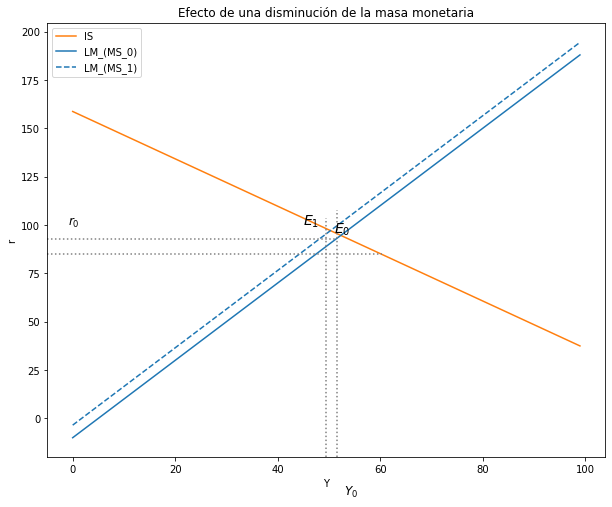

In [96]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS", color = "C1") #IS_orginal
ax.plot(Y, i, label="LM_(MS_0)", color = "C0")  #LM_original

ax.plot(Y, i_Ms, label="LM_(MS_1)", color = "C0", linestyle = 'dashed')  #LM_modificada

# Lineas de equilibrio_0 
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Lineas de equilibrio_1 
plt.axvline(x=49.5,  ymin= 0, ymax= 0.55, linestyle = ":", color = "grey")
plt.axhline(y=85, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(45,100, '$E_1$', fontsize = 14, color = 'black')

#plt.axhline(y=68, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

# Textos ploteados
plt.text(51,96, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
#plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Efecto de una disminución de la masa monetaria", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()


c) Analice los efectos sobre las variables endógenas Y, r de un incremento de la tasa de impuestos. (contractiva). El análisis debe ser intuitivo, matemático y gráfico.

- Mercado de Bienes
$$ t↑ → Co↓ → DA↓ → DA<Y → Y↓ $$ 
- Mercado de dinero
$$ Y↓ → Md↓ → Md<Ms → r↓ $$ 

- **Matemática**:

In [97]:
# nombrar variables como símbolos
Co, Io, Go, Xo, h, r, b, m, t, beta_0, beta_1  = symbols('Co Io Go Xo h r b m t beta_0, beta_1')

# nombrar variables como símbolos
k, j, Ms, P, Y = symbols('k j Ms P Y')

# Beta_0 y beta_1
beta_0 = (Co + Io + Go + Xo)
beta_1 = ( 1-(b-m)*(1-t) )

# Producto de equilibrio y la tasa de interes de equilibrio en el modelo IS-LM
Y_eq = (k*beta_0)/(k*h + j*beta_1) - ( beta_1 / (k*h + j*beta_1) )*(Ms/P)
r_eq = (j*beta_0)/(k*h + j*beta_1) + ( h / (k*h + j*beta_1) )*(Ms/P)

In [98]:
df_Y_eq_Go = diff(Y_eq, Go)
print("El Diferencial del Producto con respecto al diferencial del gasto autonomo = ", df_Y_eq_Go)  # este diferencial es positivo

El Diferencial del Producto con respecto al diferencial del gasto autonomo =  k/(h*k + j*(-(1 - t)*(b - m) + 1))


In [99]:
df_r_eq_Go = diff(r_eq, Go)
print("El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo = ", df_r_eq_Go)  # este diferencial es positivo

El Diferencial de la tasa de interes con respecto al diferencial del gasto autonomo =  j/(h*k + j*(-(1 - t)*(b - m) + 1))


- **Grafica**:

In [100]:
#1--------------------------------------------------
    # Curva IS ORIGINAL

# Parámetros

Y_size = 100 

Co = 35
Io = 40
Go = 50
Xo = 2
h = 0.8
b = 0.5
m = 0.4
t = 0.8

Y = np.arange(Y_size)


# Ecuación 
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)


#2--------------------------------------------------
    # Curva LM ORIGINAL

# Parámetros

Y_size = 100

k = 2
j = 1                
Ms = 200             
P  = 20               

Y = np.arange(Y_size)

# Ecuación

def i_LM( k, j, Ms, P, Y):
    i_LM = (-Ms/P)/j + k/j*Y
    return i_LM

i = i_LM( k, j, Ms, P, Y)

In [101]:
#--------------------------------------------------
    # NUEVA curva IS: reducción Gasto de Gobienro (Go)
    
# Definir SOLO el parámetro cambiado
t = 2

# Generar la ecuación con el nuevo parámetro
def r_IS(b, m, t, Co, Io, Go, Xo, h, Y):
    r_IS = (Co + Io + Go + Xo - Y * (1-(b-m)*(1-t)))/h
    return r_IS

r_G = r_IS(b, m, t, Co, Io, Go, Xo, h, Y)

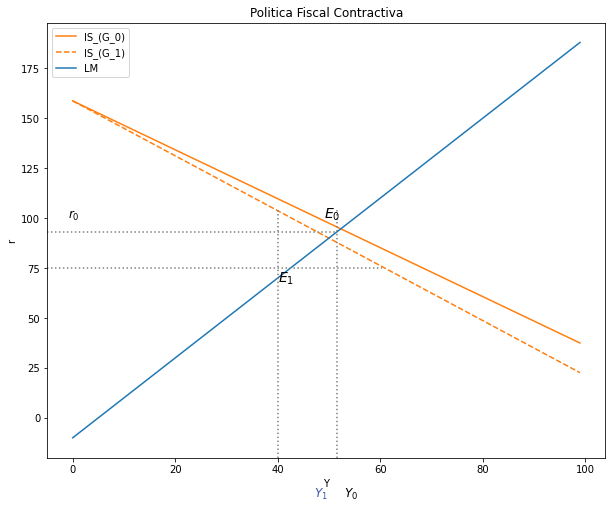

In [102]:
# Gráfico

# Dimensiones del gráfico
y_max = np.max(i)
fig, ax = plt.subplots(figsize=(10, 8))

# Curvas a graficar
ax.plot(Y, r, label = "IS_(G_0)", color = "C1") #IS_orginal
ax.plot(Y, r_G, label = "IS_(G_1)", color = "C1", linestyle = 'dashed') #IS_modificada

ax.plot(Y, i, label="LM", color = "C0")  #LM_original

# Texto y figuras agregadas
plt.axvline(x=51.5,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=93, xmin= 0, xmax= 0.52, linestyle = ":", color = "grey")

plt.axvline(x=40,  ymin= 0, ymax= 0.57, linestyle = ":", color = "grey")
plt.axhline(y=75, xmin= 0, xmax= 0.6, linestyle = ":", color = "grey")
plt.text(40,68, '$E_1$', fontsize = 14, color = 'black')

plt.text(49,100, '$E_0$', fontsize = 14, color = 'black')
plt.text(-1,100, '$r_0$', fontsize = 12, color = 'black')
plt.text(53,-40, '$Y_0$', fontsize = 12, color = 'black')
#plt.text(50,52, '$E_1$', fontsize = 14, color = '#3D59AB')
#plt.text(-1,72, '$r_1$', fontsize = 12, color = '#3D59AB')
plt.text(47,-40, '$Y_1$', fontsize = 12, color = '#3D59AB')

#plt.text(69, 115, '→', fontsize=15, color='grey')
#plt.text(69, 52, '←', fontsize=15, color='grey')

# Título, ejes y leyenda
ax.set(title="Politica Fiscal Contractiva", xlabel= r'Y', ylabel= r'r')
ax.legend()

plt.show()


# EXTRA

Encuentre las ecuaciones de Ingreso  y tasa de interes  de equilibrio(Escriba paso a paso la derivacion de estas ecuaciones).
Grafique el equilibrio simultáneo en los mercados de bienes y de dinero.